<a href="https://colab.research.google.com/github/Mashiat12/Synthetic_Brain_Image_Generation/blob/main/Image_generation_using_gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
!pip install matplotlib-venn
!pip install tensorflow

In [ ]:
import random
import os
import json
from zipfile import ZipFile
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm
from __future__ import print_function
import argparse
import torch.backends.cudnn as cudnn
import matplotlib.animation as animation
import pandas as pd
from PIL import Image
import time
import glob
import imageio
import cv2
import pathlib
import zipfile
import sys
import pandas as pd

import torchvision
from torch.utils.data import Dataset, DataLoader, ConcatDataset, TensorDataset
from torchvision.utils import make_grid
import torch.optim as optim
from torchvision.datasets import MNIST

from skimage import io, transform

from IPython import display
from IPython.display import HTML
manualSeed = 999
random.seed(manualSeed)
torch.manual_seed(manualSeed)


In [ ]:
!pip install graphviz
!pip install torchsummary
! pip install torchview
from torchsummary import summary
import torchvision
from torchview import draw_graph

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        print("CUDA is available. Using GPU.")
        return torch.device('cuda')
    else:
        print("CUDA is not available. Using CPU.")
        return torch.device('cpu')

device = get_default_device()

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

CUDA is available. Using GPU.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kaggle_credentails= json.load(open("/content/drive/MyDrive/kaggle.json"))

In [ ]:
#kaggle_credentails= json.load(open("kaggle.json"))
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']
!kaggle datasets download -d ashfakyeafi/brain-mri-images

Dataset URL: https://www.kaggle.com/datasets/ashfakyeafi/brain-mri-images
License(s): apache-2.0
100% 348M/348M [00:20<00:00, 21.9MB/s]
100% 348M/348M [00:20<00:00, 18.1MB/s]


In [ ]:
with ZipFile("brain-mri-images.zip",'r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print("Length of directory : ",len(os.listdir("/content/GAN-Traning Images")))

Length of directory :  14715


In [ ]:
DATA_DIR = '/content/brain'
#images = os.listdir(PATH)
#img=mpimg.imread(images)
#print(img.shape)
#plt.imshow(img)
print(os.listdir(DATA_DIR))
device

['GAN-Traning Images']


device(type='cuda')

In [ ]:
from torchvision.datasets import ImageFolder,VisionDataset
import torchvision.transforms as T

In [ ]:
image_size=64
batch_size=128
stats=(0.5,0.5,0.5),(0.5,0.5,0.5)
device

device(type='cuda')

In [ ]:
train_ds= ImageFolder(DATA_DIR,transform=T.Compose([T.Resize(image_size),T.CenterCrop(image_size),T.ToTensor(),T.Normalize(*stats)]))
train_dl =DataLoader(train_ds,batch_size,shuffle=True,num_workers=3,pin_memory=True)
device

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


device(type='cuda')

In [ ]:
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def denorm(img_tensors):
  return img_tensors * stats[1][0]+stats[0][0]
device

device(type='cuda')

In [ ]:
def show_images(images,nmax=64):
  fig,ax=plt.subplots(figsize=(8,8))
  ax.set_xticks([]);
  ax.set_yticks([])
  ax.imshow(make_grid(denorm(images.detach()[:nmax]),nrow=8).permute(1,2,0))

def show_batch(dl,nmax=64):
  for images,_ in dl:
    show_images(images,nmax)
    break

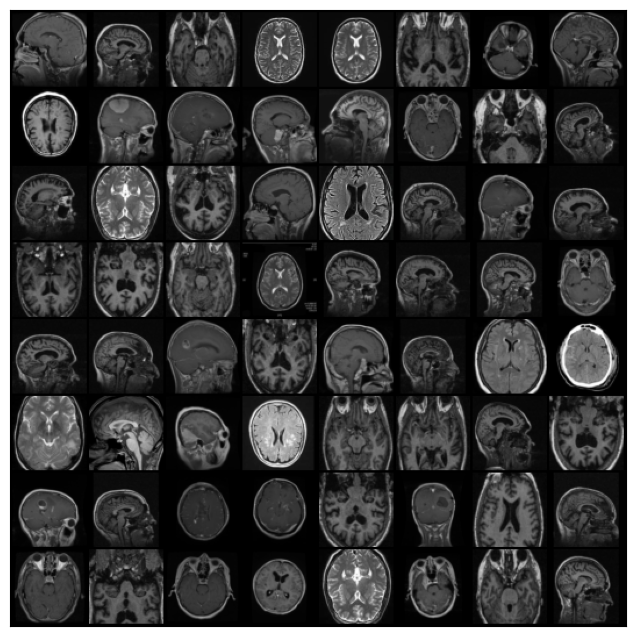

In [ ]:
show_batch(train_dl)

In [ ]:
discriminator =nn.Sequential(
    nn.Conv2d(3,64,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(64),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(64,128,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(128),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(128,256,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(256),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(256,512,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(512),
    nn.LeakyReLU(0.2,inplace=True),

    nn.Conv2d(512,1,kernel_size=4,stride=1,padding=0,bias=False),

    nn.Flatten(),
    nn.Sigmoid()
)
device

device(type='cuda')

In [ ]:
discriminator = to_device(discriminator,device)
device

device(type='cuda')

In [ ]:
latent_size=128
device

device(type='cuda')

In [ ]:
generator=nn.Sequential(
    nn.ConvTranspose2d(latent_size,512,kernel_size=4,stride=1,padding=0,bias=False),
    nn.BatchNorm2d(512),
    nn.ReLU(True),

    nn.ConvTranspose2d(512,256,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(256),
    nn.ReLU(True),

    nn.ConvTranspose2d(256,128,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(128),
    nn.ReLU(True),

    nn.ConvTranspose2d(128,64,kernel_size=4,stride=2,padding=1,bias=False),
    nn.BatchNorm2d(64),
    nn.ReLU(True),

    nn.ConvTranspose2d(64,3,kernel_size=4,stride=2,padding=1,bias=False),
    nn.Tanh(),
)
device

device(type='cuda')

In [ ]:
xb=torch.randn(batch_size,latent_size,1,1)
print(xb.shape)
device

torch.Size([128, 128, 1, 1])


device(type='cuda')

torch.Size([128, 3, 64, 64])


device(type='cuda')

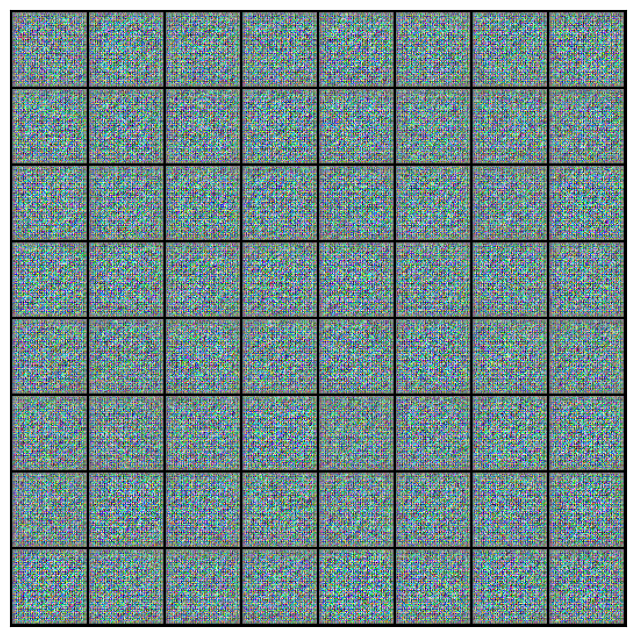

In [ ]:
fake_images=generator(xb)
print(fake_images.shape)
show_images(fake_images)
device

In [ ]:
generator=to_device(generator,device)

In [ ]:
def train_discriminator(real_images,opt_d):
  opt_d.zero_grad()
  real_images=real_images.to(device)
  real_preds= discriminator(real_images)
  real_targets=torch.ones(real_images.size(0),1,device=device)
  real_loss= F.binary_cross_entropy(real_preds,real_targets)
  real_score=torch.mean(real_preds).item()

  latent=torch.randn(batch_size,latent_size,1,1,device=device)
  fake_images=generator(latent)

  fake_targets= torch.zeros(fake_images.size(0),1,device=device)
  fake_preds= discriminator(fake_images)
  fake_loss= F.binary_cross_entropy(fake_preds,fake_targets)
  fake_score=torch.mean(fake_preds).item()

  loss=real_loss + fake_loss
  loss.backward()
  opt_d.step()
  return loss.item(),real_score,fake_score

In [ ]:
def train_generator(opt_g):
  opt_g.zero_grad()

  latent=torch.randn(batch_size,latent_size,1,1,device=device)
  fake_images=generator(latent)
  preds= discriminator(fake_images)
  targets=torch.ones(batch_size,1,device=device)
  loss= F.binary_cross_entropy(preds,targets)
  loss.backward()
  opt_g.step()
  return loss.item()

In [ ]:
sample_dir='generated'
os.makedirs(sample_dir,exist_ok=True)

In [ ]:
def save_samples(index,latent_tensors,show=True):
  fake_images=generator(latent_tensors)
  fake_fname='generated-images-{0:0=4d}.png'.format(index)
  save_image(denorm(fake_images),os.path.join(sample_dir,fake_fname),nrow=8)
  print('Saving',fake_fname)
  if show:
    fig,ax=plt.subplots(figsize=(8,8))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(fake_images.cpu().detach(),nrow=8).permute(1,2,0))

In [ ]:
fixed_latent= torch.randn(64,latent_size,1,1,device=device)


Saving generated-images-0000.png


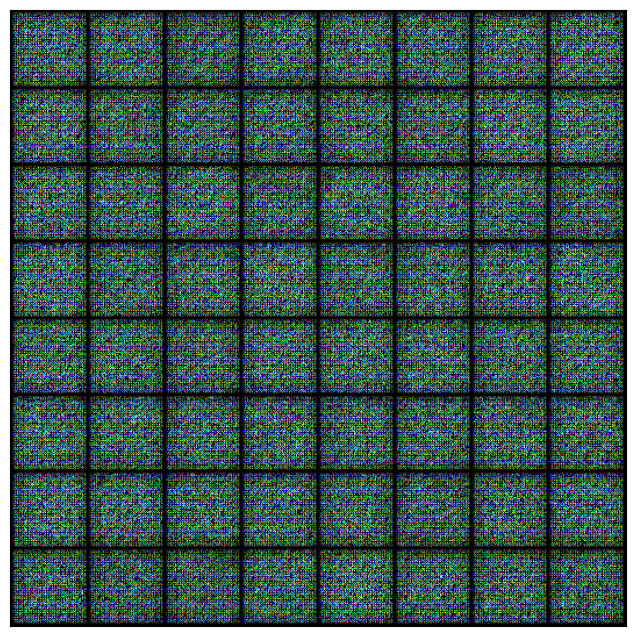

In [ ]:
save_samples(0,fixed_latent)

Saving generated-images-0001.png


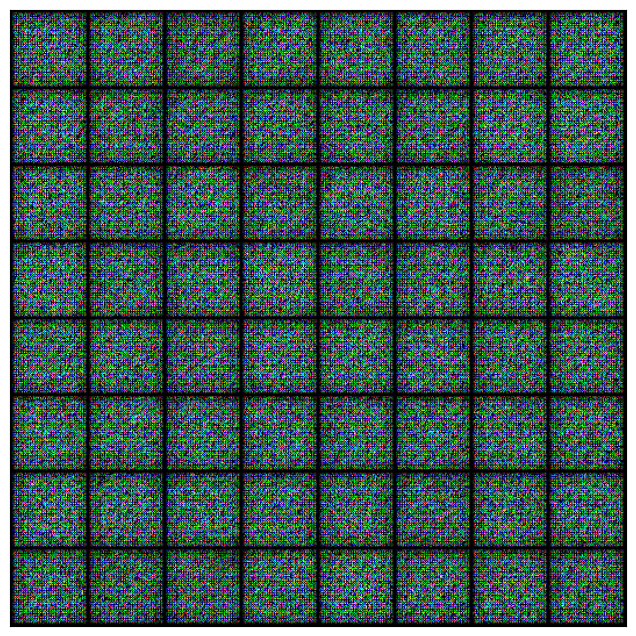

In [ ]:
save_samples(1,fixed_latent)

Saving generated-images-0015.png


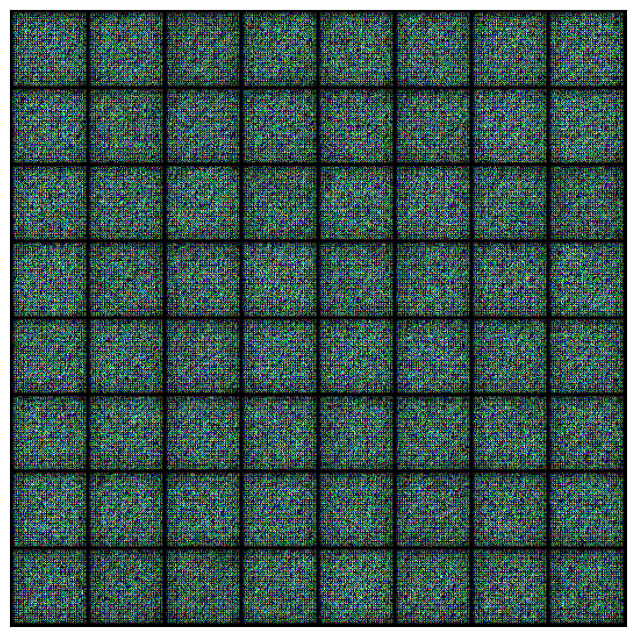

In [ ]:
save_samples(15,fixed_latent)

In [ ]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

In [ ]:
def fit(epochs,lr,start_idx=1):
  torch.cuda.empty_cache()
  losses_g=[]
  losses_d=[]
  real_scores=[]
  fake_scores=[]

  opt_d=torch.optim.Adam(discriminator.parameters(),lr=lr,betas=(0.5,0.999))
  opt_g=torch.optim.Adam(generator.parameters(),lr=lr,betas=(0.5,0.999))

  for epoch in range(epochs):
    for real_images, _ in tqdm(train_dl):
      loss_d,real_score,fake_score= train_discriminator(real_images,opt_d)
      loss_g = train_generator(opt_g)

    losses_g.append(loss_g)
    losses_d.append(loss_d)
    real_scores.append(real_score)
    fake_scores.append(fake_score)
    print("Epoch[{}/{}], loss_g: {:.4f}, loss_d: {:.4f}, real_score: {:.4f}, fake_score: {:.4f}".format(
            epoch+1, epochs, loss_g, loss_d, real_score, fake_score))

    save_samples(epoch+start_idx,fixed_latent,show=False)
  return losses_g,losses_d,real_scores,fake_scores

In [ ]:
lr =0.0002
epochs=25

In [ ]:
history= fit(epochs,lr)

  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[1/25], loss_g: 16.3794, loss_d: 0.0982, real_score: 0.9245, fake_score: 0.0000
Saving generated-images-0001.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[2/25], loss_g: 2.4142, loss_d: 0.4674, real_score: 0.6822, fake_score: 0.0180
Saving generated-images-0002.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[3/25], loss_g: 5.8364, loss_d: 0.3046, real_score: 0.9284, fake_score: 0.1769
Saving generated-images-0003.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[4/25], loss_g: 6.3427, loss_d: 0.0803, real_score: 0.9447, fake_score: 0.0137
Saving generated-images-0004.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[5/25], loss_g: 3.7595, loss_d: 0.2017, real_score: 0.8706, fake_score: 0.0372
Saving generated-images-0005.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[6/25], loss_g: 3.5187, loss_d: 0.5514, real_score: 0.6684, fake_score: 0.0174
Saving generated-images-0006.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[7/25], loss_g: 5.2190, loss_d: 0.0629, real_score: 0.9552, fake_score: 0.0136
Saving generated-images-0007.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[8/25], loss_g: 4.9418, loss_d: 0.1807, real_score: 0.9428, fake_score: 0.1029
Saving generated-images-0008.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[9/25], loss_g: 6.0888, loss_d: 0.3683, real_score: 0.7592, fake_score: 0.0040
Saving generated-images-0009.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[10/25], loss_g: 5.0905, loss_d: 0.1271, real_score: 0.9584, fake_score: 0.0739
Saving generated-images-0010.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[11/25], loss_g: 5.3133, loss_d: 0.1680, real_score: 0.9607, fake_score: 0.1146
Saving generated-images-0011.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[12/25], loss_g: 6.5872, loss_d: 0.3727, real_score: 0.9264, fake_score: 0.2390
Saving generated-images-0012.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[13/25], loss_g: 4.6292, loss_d: 0.0939, real_score: 0.9410, fake_score: 0.0251
Saving generated-images-0013.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[14/25], loss_g: 3.9974, loss_d: 0.2030, real_score: 0.9261, fake_score: 0.1035
Saving generated-images-0014.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[15/25], loss_g: 4.3436, loss_d: 0.1119, real_score: 0.9636, fake_score: 0.0673
Saving generated-images-0015.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[16/25], loss_g: 4.8085, loss_d: 0.3758, real_score: 0.9286, fake_score: 0.2310
Saving generated-images-0016.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[17/25], loss_g: 5.1933, loss_d: 0.2999, real_score: 0.9688, fake_score: 0.2078
Saving generated-images-0017.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[18/25], loss_g: 3.8122, loss_d: 0.2621, real_score: 0.8326, fake_score: 0.0218
Saving generated-images-0018.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[19/25], loss_g: 4.0276, loss_d: 0.2771, real_score: 0.8936, fake_score: 0.1265
Saving generated-images-0019.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[20/25], loss_g: 4.9258, loss_d: 0.1409, real_score: 0.9089, fake_score: 0.0312
Saving generated-images-0020.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[21/25], loss_g: 2.6311, loss_d: 0.2168, real_score: 0.8466, fake_score: 0.0276
Saving generated-images-0021.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[22/25], loss_g: 3.0713, loss_d: 0.2303, real_score: 0.8675, fake_score: 0.0630
Saving generated-images-0022.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[23/25], loss_g: 4.0425, loss_d: 0.1428, real_score: 0.9424, fake_score: 0.0678
Saving generated-images-0023.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[24/25], loss_g: 2.9389, loss_d: 0.1877, real_score: 0.9077, fake_score: 0.0678
Saving generated-images-0024.png


  0%|          | 0/115 [00:00<?, ?it/s]

Epoch[25/25], loss_g: 3.5624, loss_d: 0.1316, real_score: 0.9266, fake_score: 0.0479
Saving generated-images-0025.png


In [ ]:
losses_g,losses_d,real_scores,fake_scores=history

In [ ]:
torch.save(generator.state_dict(),'Generator.pth')
torch.save(discriminator.state_dict(),'Discriminator.pth')

In [ ]:
from IPython.display import Image

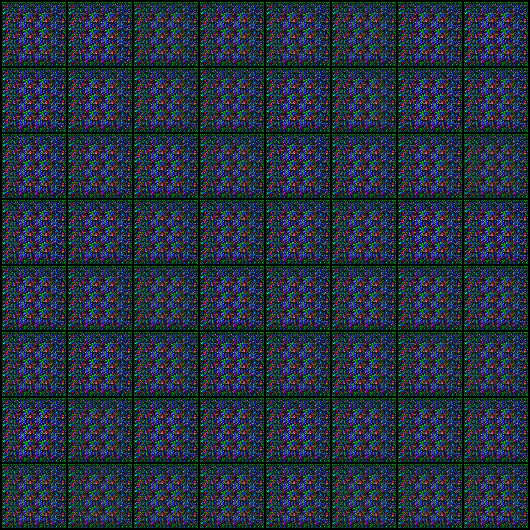

In [ ]:
Image('./generated/generated-images-0001.png')

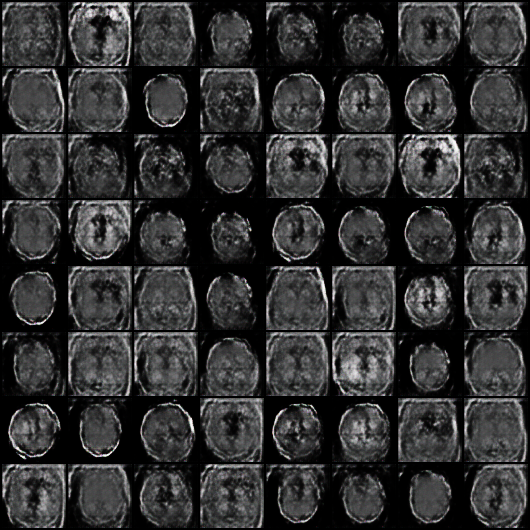

In [ ]:
Image('./generated/generated-images-0010.png')

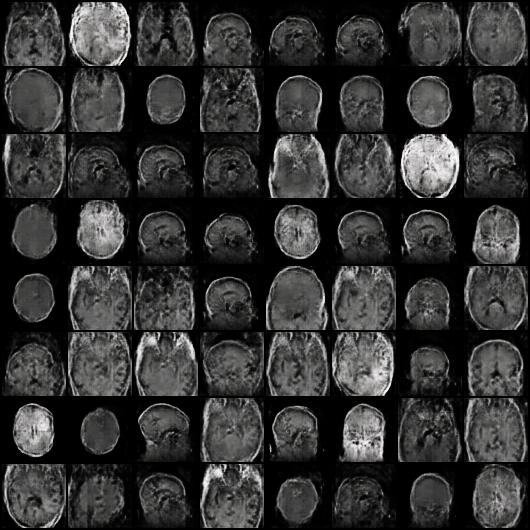

In [ ]:
Image('./generated/generated-images-0025.png')

In [ ]:
import json

drive_dir = '/content/drive/MyDrive/GAN_metrics1/'
import os
os.makedirs(drive_dir, exist_ok=True)
with open(drive_dir + 'losses_g.json', 'w') as f:
    json.dump(losses_g, f)
with open(drive_dir + 'losses_d.json', 'w') as f:
    json.dump(losses_d, f)
with open(drive_dir + 'real_scores.json', 'w') as f:
    json.dump(real_scores, f)
with open(drive_dir + 'fake_scores.json', 'w') as f:
    json.dump(fake_scores, f)

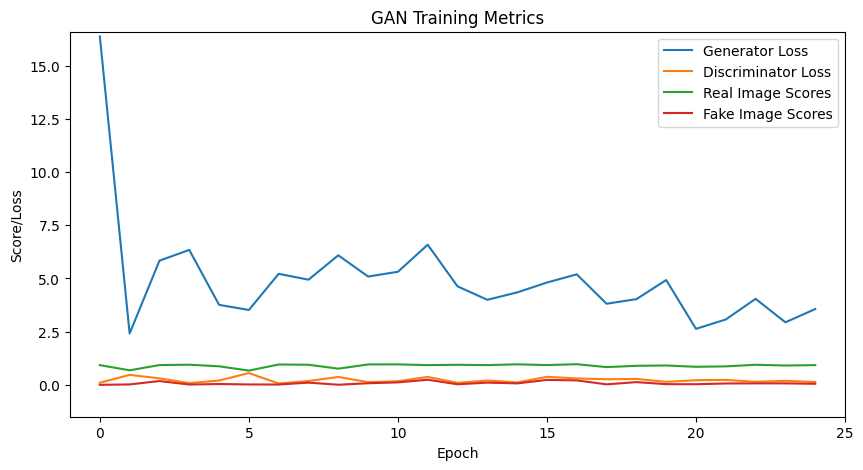

In [ ]:
import json
import matplotlib.pyplot as plt
drive_dir = '/content/drive/MyDrive/GAN_metrics1/'
with open(drive_dir + 'losses_g.json', 'r') as f:
    losses_g = json.load(f)
with open(drive_dir + 'losses_d.json', 'r') as f:
    losses_d = json.load(f)
with open(drive_dir + 'real_scores.json', 'r') as f:
    real_scores = json.load(f)
with open(drive_dir + 'fake_scores.json', 'r') as f:
    fake_scores = json.load(f)

epochs = len(losses_g)
def plot_training_metrics(losses_g, losses_d, real_scores, fake_scores, epochs):

    plt.figure(figsize=(10, 5))
    plt.title("GAN Training Metrics")
    plt.plot(losses_g, label="Generator Loss")
    plt.plot(losses_d, label="Discriminator Loss")
    plt.plot(real_scores, label="Real Image Scores")
    plt.plot(fake_scores, label="Fake Image Scores")
    plt.xlabel("Epoch")
    plt.ylabel("Score/Loss")
    plt.xlim(-1, 25)
    plt.ylim(-1.5, 16.6)
    plt.legend()
    plt.show()


# Plot the metrics
plot_training_metrics(losses_g, losses_d, real_scores, fake_scores, epochs)